In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('/content/drive/MyDrive/datasets/financial comments.csv',encoding='latin-1',names=['label','comments'])
df

,label,comments
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...
...,...,...
4841,negative,LONDON MarketWatch -- Share prices ended lower...
4842,neutral,Rinkuskiai 's beer sales fell by 6.5 per cent ...
4843,negative,Operating profit fell to EUR 35.4 mn from EUR ...
4844,negative,Net sales of the Paper segment decreased to EU...


In [3]:
df.isna().sum()

label       0
comments    0
dtype: int64

In [4]:
df.label.value_counts(normalize=True)

neutral     0.594098
positive    0.281263
negative    0.124639
Name: label, dtype: float64



1.   this is imablanced data
2.   so its better to do some sampling techniques
3.   i wll manually duplicate samples



In [5]:
df.label=df.label.map({'neutral':1,'negative':0,'positive':2})

In [6]:
df

,label,comments
0,1,"According to Gran , the company has no plans t..."
1,1,Technopolis plans to develop in stages an area...
2,0,The international electronic industry company ...
3,2,With the new production plant the company woul...
4,2,According to the company 's updated strategy f...
...,...,...
4841,0,LONDON MarketWatch -- Share prices ended lower...
4842,1,Rinkuskiai 's beer sales fell by 6.5 per cent ...
4843,0,Operating profit fell to EUR 35.4 mn from EUR ...
4844,0,Net sales of the Paper segment decreased to EU...


In [7]:
randomseed=44
neu,pos,neg=df.label.value_counts()
neu,pos,neg

(2879, 1363, 604)

In [8]:
df_neg=df[df['label']==0]
df_neu=df[df['label']==1]
df_pos=df[df['label']==2]

##  upsampling positive and negative samples to make data balanced

In [9]:
df_neg.head()

,label,comments
2,0,The international electronic industry company ...
415,0,A tinyurl link takes users to a scamming site ...
421,0,"Compared with the FTSE 100 index , which rose ..."
423,0,"Compared with the FTSE 100 index , which rose ..."
500,0,One of the challenges in the oil production in...


In [10]:
df_neu

,label,comments
0,1,"According to Gran , the company has no plans t..."
1,1,Technopolis plans to develop in stages an area...
58,1,At the request of Finnish media company Alma M...
59,1,"In Sweden , Gallerix accumulated SEK denominat..."
60,1,The company supports its global customers in d...
...,...,...
4819,1,"Nevertheless , the development can not be allo..."
4820,1,"Besides , as there is no depositor preference ..."
4823,1,It holds 38 percent of Outokumpu 's shares and...
4826,1,Mobile communication and wireless broadband pr...


In [11]:
df_pos

,label,comments
3,2,With the new production plant the company woul...
4,2,According to the company 's updated strategy f...
5,2,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...
6,2,"For the last quarter of 2010 , Componenta 's n..."
7,2,"In the third quarter of 2010 , net sales incre..."
...,...,...
4775,2,"The apartment block will be well-located , in ..."
4780,2,"The antibody , given at repeated doses of up t..."
4786,2,Danske Bank A-S DANSKE DC jumped 3.7 percent t...
4787,2,Our superior customer centricity and expertise...


In [12]:
df_neg_over=df_neg.sample(neu-neg,replace=True)
df=pd.concat([df,df_neg_over])

In [13]:
df_pos_over=df_pos.sample(neu-pos,replace=True)
df=pd.concat([df,df_pos_over])

In [14]:
df.label.value_counts()

2    2879
1    2879
0    2879
Name: label, dtype: int64

In [15]:
df.reset_index(inplace=True)
df.drop('index',axis=1,inplace=True)
df

,label,comments
0,1,"According to Gran , the company has no plans t..."
1,1,Technopolis plans to develop in stages an area...
2,0,The international electronic industry company ...
3,2,With the new production plant the company woul...
4,2,According to the company 's updated strategy f...
...,...,...
8632,2,"In contrast , the company 's net loss for the ..."
8633,2,"` For Nordea , moving into the new headquarter..."
8634,2,The value of the firm 's forestry holdings inc...
8635,2,"Fiskars , the World 's 1 Scissors Brand TM , ..."


## text cleansing

In [16]:
import nltk
nltk.download('stopwords')
import re
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
import string

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
%%time
stemmer = SnowballStemmer('english')
corpus = []
for i in range(0, len(df.comments)):

    review = re.sub('[^a-zA-Z]', ' ', df['comments'][i])
    review = review.lower()
    review = review.split()
    
    review = [stemmer.stem(word) for word in review if not word in stopwords.words('english') if word not in string.punctuation]
    review = ' '.join(review)
    corpus.append(review)

CPU times: user 16.9 s, sys: 1.74 s, total: 18.6 s
Wall time: 18.6 s


In [18]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [19]:
corpus[0:5]

['accord gran compani plan move product russia although compani grow',
 'technopoli plan develop stage area less squar meter order host compani work comput technolog telecommun statement said',
 'intern electron industri compani elcoteq laid ten employe tallinn facil contrari earlier layoff compani contract rank offic worker daili postime report',
 'new product plant compani would increas capac meet expect increas demand would improv use raw materi therefor increas product profit',
 'accord compani updat strategi year baswar target long term net sale growth rang oper profit margin net sale']

In [20]:
voc_size=5000
sent_length=30
embedding_dim=50

In [21]:
t=Tokenizer(num_words=voc_size,oov_token='no comments')
t.fit_on_texts(corpus)

In [22]:
tokenized_sent=t.texts_to_sequences(corpus)

In [23]:
embedded_docs=pad_sequences(tokenized_sent,padding='pre',truncating='pre',maxlen=sent_length)
len(embedded_docs[0])

30

## train test split

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(embedded_docs,df['label'],random_state=randomseed,test_size=.3)



--- Actually training and testing data should be preprocessed separately inorder to avoid dataleakage or use a pipeline



In [25]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((6045, 30), (2592, 30), (6045,), (2592,))

## deeplearning model:

In [26]:
from tensorflow.keras.layers import Dense,LSTM,Dropout,Embedding
from tensorflow.keras.models import Sequential
from keras.optimizers import Adam
from keras.metrics import sparse_categorical_crossentropy,categorical_crossentropy

In [27]:
%%time
model=Sequential()
model.add(Embedding(voc_size,embedding_dim,input_length=sent_length))
model.add(LSTM(30,return_sequences=True))
model.add(LSTM(20))
model.add(Dropout(seed=randomseed,rate=0.2))
model.add(Dense(32,activation='relu'))
model.add(Dense(3,activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 30, 50)            250000    
_________________________________________________________________
lstm (LSTM)                  (None, 30, 30)            9720      
_________________________________________________________________
lstm_1 (LSTM)                (None, 20)                4080      
_________________________________________________________________
dropout (Dropout)            (None, 20)                0         
_________________________________________________________________
dense (Dense)                (None, 32)                672       
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 99        
Total params: 264,571
Trainable params: 264,571
Non-trainable params: 0
__________________________________________________

In [28]:
%%time
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=30,verbose=1,batch_size=128)

Epoch 1/30
48/48 [==============================] - 5s 25ms/step - loss: 1.0474 - accuracy: 0.4280 - val_loss: 0.8996 - val_accuracy: 0.6111
Epoch 2/30
48/48 [==============================] - 1s 11ms/step - loss: 0.7051 - accuracy: 0.6890 - val_loss: 0.5651 - val_accuracy: 0.7785
Epoch 3/30
48/48 [==============================] - 1s 11ms/step - loss: 0.3945 - accuracy: 0.8577 - val_loss: 0.4278 - val_accuracy: 0.8453
Epoch 4/30
48/48 [==============================] - 1s 12ms/step - loss: 0.2501 - accuracy: 0.9270 - val_loss: 0.4148 - val_accuracy: 0.8630
Epoch 5/30
48/48 [==============================] - 1s 11ms/step - loss: 0.1910 - accuracy: 0.9457 - val_loss: 0.4405 - val_accuracy: 0.8669
Epoch 6/30
48/48 [==============================] - 1s 11ms/step - loss: 0.1592 - accuracy: 0.9558 - val_loss: 0.4223 - val_accuracy: 0.8750
Epoch 7/30
48/48 [==============================] - 1s 11ms/step - loss: 0.1314 - accuracy: 0.9651 - val_loss: 0.4604 - val_accuracy: 0.8777
Epoch 8/30
48

In [29]:
y_pred=np.argmax(model.predict(x_test), axis=-1)
y_pred

array([0, 1, 0, ..., 0, 2, 2])

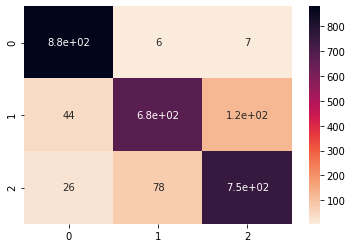

In [30]:
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
a=confusion_matrix(y_test,y_pred)
sns.heatmap(a,annot=True,cmap='rocket_r')

In [31]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.95       892
           1       0.89      0.80      0.84       845
           2       0.85      0.88      0.86       855

    accuracy                           0.89      2592
   macro avg       0.89      0.89      0.89      2592
weighted avg       0.89      0.89      0.89      2592





--- the recall score for class 1() is low which means the model is not able to correctly predict class 1



# without neural networks

In [32]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import  DecisionTreeClassifier
mnb=MultinomialNB()
rf=RandomForestClassifier()
dt=DecisionTreeClassifier()

In [33]:
x_train

array([[   0,    0,    0, ..., 1401,  265, 1093],
       [   0,    0,    0, ..., 1570,   49,   35],
       [   0,    0,    0, ...,   29,   13,  376],
       ...,
       [   0,    0,    0, ...,  575,  926,  346],
       [   0,    0,    0, ...,  120,   15, 1658],
       [   0,    0,    0, ...,   33,  625,  557]], dtype=int32)

In [34]:
mnb.fit(x_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [35]:
mnb_pred=mnb.predict(x_test)
print(classification_report(y_test,mnb_pred))

              precision    recall  f1-score   support

           0       0.35      0.24      0.29       892
           1       0.34      0.58      0.43       845
           2       0.40      0.26      0.31       855

    accuracy                           0.36      2592
   macro avg       0.36      0.36      0.34      2592
weighted avg       0.36      0.36      0.34      2592



In [36]:
rf.fit(x_train,y_train)
rf_pred=rf.predict(x_test)
print(classification_report(y_test,rf_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       892
           1       0.81      0.85      0.83       845
           2       0.87      0.79      0.82       855

    accuracy                           0.87      2592
   macro avg       0.87      0.87      0.87      2592
weighted avg       0.87      0.87      0.87      2592



In [37]:
dt.fit(x_train,y_train)
dt_pred=dt.predict(x_test)
print(classification_report(y_test,dt_pred))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92       892
           1       0.82      0.63      0.71       845
           2       0.75      0.83      0.79       855

    accuracy                           0.81      2592
   macro avg       0.81      0.81      0.81      2592
weighted avg       0.81      0.81      0.81      2592




##   ---> lstm model and randomforest model have almost same accuracy
